# HAPPINESS REPORT OF DIFFERENT COUNTRIES

# INTRODUCTION
Happiness is the most important aspects in our life. The most challenging work is to stay happy in today's world. 
In this entire data i have worked to inspect what are the factors which make a country's people happy. 
In this project i have worked on various factors to make a country most suitable place to stay happy. 
In brief i have tried to predict and summarize which countries rank highest in terms of happiness and which aspects there happiness depends on.

In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
# loading the data set for top countries

happiness2015 = pd.read_csv('happiness_score_dataset.csv')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# loading the data set for bottom countries

happiness2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


##### The above dataset shows us the top and bottom 5 countires keeping all the factors like GDP per capita, family,health,freedom,trust,generosity and dystopia residual into consideration.

In [5]:
happiness2015.shape

(158, 12)

#### The above statment shows that there is altogether 158 rows and 12 columns in entire data set.

In [5]:
# lets find out is there any null values in all the cloumns

pd.set_option('display.max_rows',None)

In [6]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### The above statement help us to know that there is no null values in all the 12 columns. There is 9 columns which is float type, 2 columns is in object type and 1 column is in integer type.

In [7]:
# lets find out the mean, counts, standard deviation and outliers

happiness2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### The above table help us to know is there any missing values in dataset. It also help us to know the mean and standard diviation from the above table.The difference between mean and median(50%) help us to understand is there any outliers in dataset.As there is hardly any difference between mean and median so there is no outliers in dataset.

In [8]:
# Correlation in table format

corr_mat = happiness2015.corr()
corr_mat

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


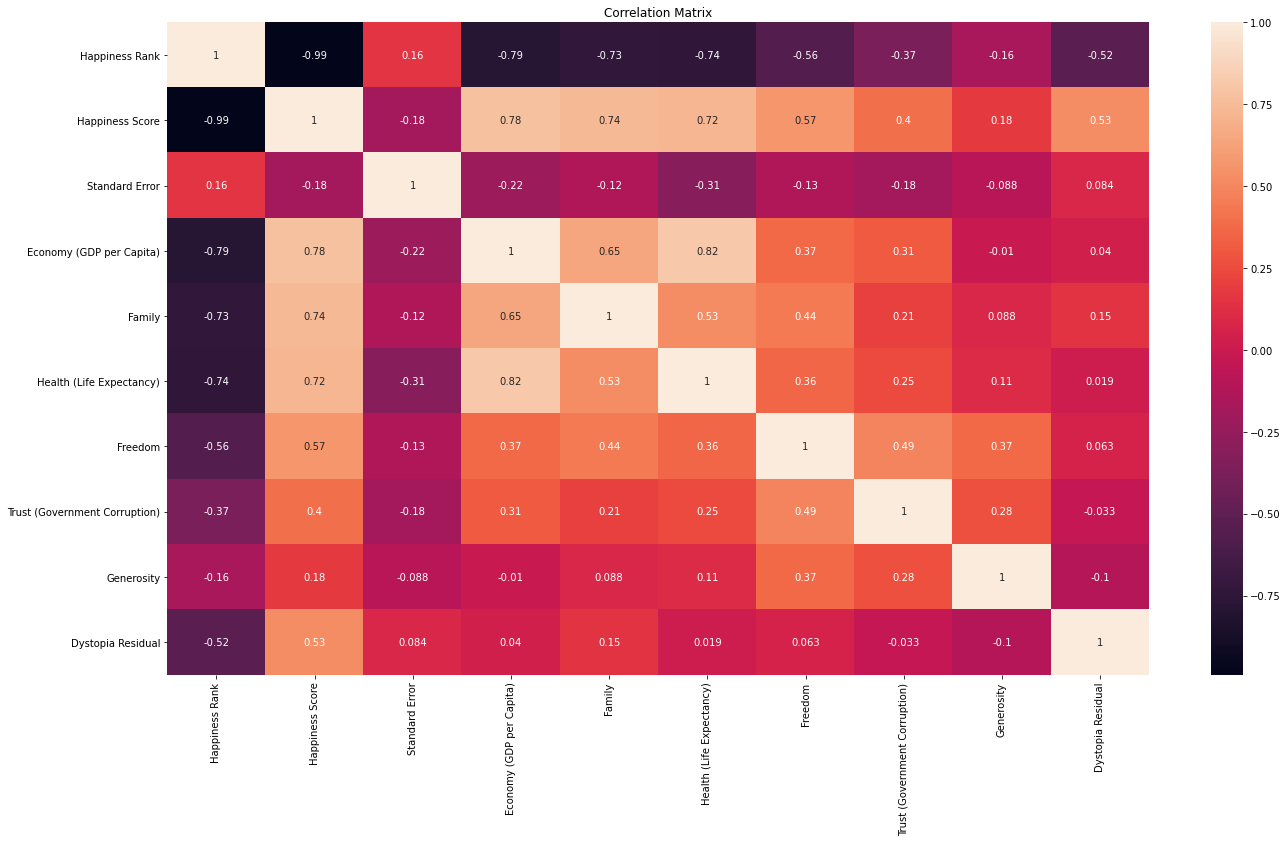

In [9]:
#Correlation through heat map

plt.figure(figsize = [22,12])
sns.heatmap(corr_mat,annot = True)
plt.title("Correlation Matrix")
plt.show()

#### The above table and heat map helps us to find out how happiness score is inter related to other factors.It is found that factor which affects happiness score the most is Economy(GDP per capita) i.e 78% and the factor which affects the happiness score least is trust(government corruption) i.e 40%

# EDA - World Happiness Dataset 

## Top 10 Happiest Countries 

In [10]:
# list of top 10 happy countries

happiness2015_top10 = happiness2015.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).head(10).reset_index()
happiness2015_top10.columns = ['Country','Happiness Score']
happiness2015_top10

,Country,Happiness Score
0,Switzerland,7.587
1,Iceland,7.561
2,Denmark,7.527
3,Norway,7.522
4,Canada,7.427
5,Finland,7.406
6,Netherlands,7.378
7,Sweden,7.364
8,New Zealand,7.286
9,Australia,7.284


(0.0, 8.0)

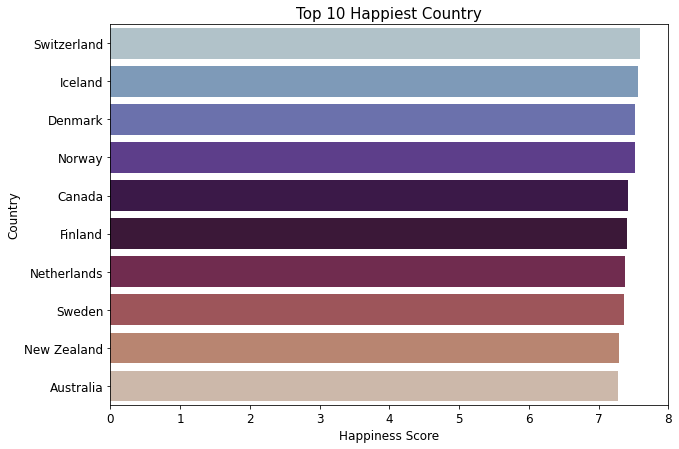

In [11]:
# visualize top 10 happiest country through EDA

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_top10['Country'], x=happiness2015_top10['Happiness Score'], palette='twilight', orient='h')
plt.title('Top 10 Happiest Country', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 8)

#### The above table and barplot help us to know that Switzerland is the happiest country.

## Bottom 10 happy countries

In [12]:
# list of bottom 10 happy countries

happiness2015_bottom10 = happiness2015.groupby('Country')['Happiness Score'].max().sort_values(ascending=False).tail(10).reset_index()
happiness2015_bottom10.columns = ['Country','Happiness Score']
happiness2015_bottom10

,Country,Happiness Score
0,Chad,3.667
1,Guinea,3.656
2,Ivory Coast,3.655
3,Burkina Faso,3.587
4,Afghanistan,3.575
5,Rwanda,3.465
6,Benin,3.340
7,Syria,3.006
8,Burundi,2.905
9,Togo,2.839


(0.0, 4.0)

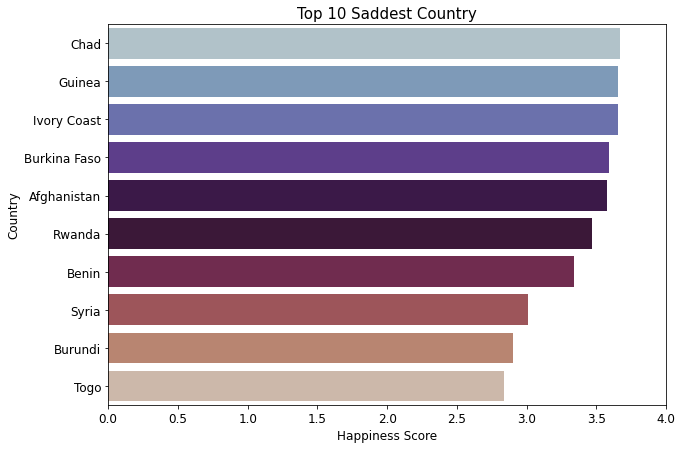

In [13]:
# visualize top 10 saddest country through EDA

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_bottom10['Country'], x=happiness2015_bottom10['Happiness Score'], palette='twilight', orient='h')
plt.title('Top 10 Saddest Country', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 4)

#### The above table and barplot help us to know that Togo is the lowest happiness score country.

### Top 10 Countries With Highest Economy (GDP per Capita) 

In [14]:
# top countries in terms of GDP

happiness2015_gdp_top10 = happiness2015.groupby('Country')['Economy (GDP per Capita)'].max().sort_values(ascending=False).head(10).reset_index()
happiness2015_gdp_top10.columns = ['Country','Economy (GDP per Capita)']
happiness2015_gdp_top10

,Country,Economy (GDP per Capita)
0,Qatar,1.69042
1,Luxembourg,1.56391
2,Kuwait,1.55422
3,Singapore,1.52186
4,Norway,1.45900
5,United Arab Emirates,1.42727
6,Switzerland,1.39651
7,Saudi Arabia,1.39541
8,United States,1.39451
9,Hong Kong,1.38604


(0.0, 2.0)

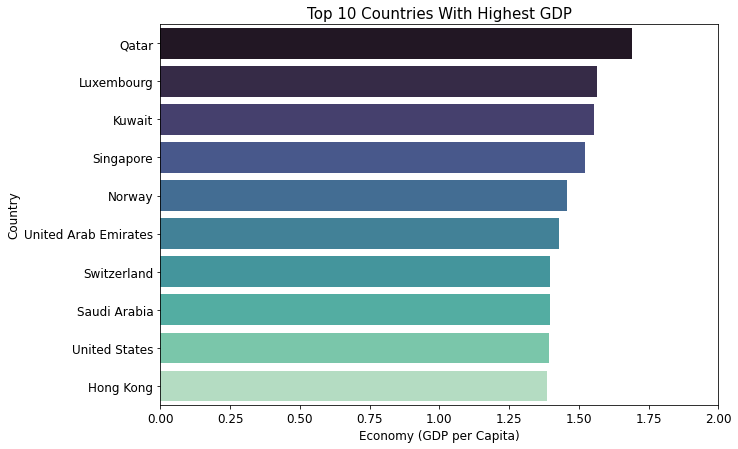

In [15]:
# visualization of top 10 countries ,gdp per capita

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_gdp_top10['Country'], x=happiness2015_gdp_top10['Economy (GDP per Capita)'], palette='mako', orient='h')
plt.title('Top 10 Countries With Highest GDP', fontsize=15)
plt.xlabel('Economy (GDP per Capita)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 2)

#### The above table and barplot help us to know that Qatar GDP is highest

### Top 10 Countries With Lowest GDP Per Capita 

In [16]:
# country with lowest gdp

happiness2015_gdp_bottom10 = happiness2015.groupby('Country')['Economy (GDP per Capita)'].max().sort_values(ascending=False).tail(10).reset_index()
happiness2015_gdp_bottom10.columns = ['Country','Economy (GDP per Capita)']
happiness2015_gdp_bottom10

,Country,Economy (GDP per Capita)
0,Ethiopia,0.19073
1,Somaliland region,0.18847
2,Guinea,0.17417
3,Mozambique,0.08308
4,Central African Republic,0.07850
5,Liberia,0.07120
6,Niger,0.06940
7,Malawi,0.01604
8,Burundi,0.01530
9,Congo (Kinshasa),0.00000


(0.0, 0.3)

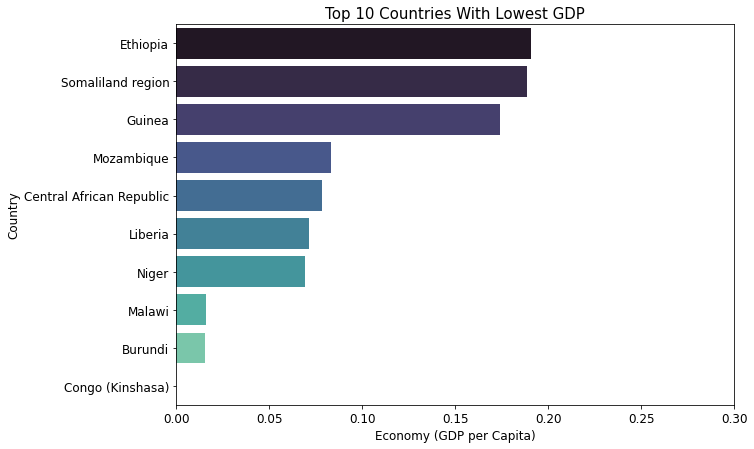

In [17]:
# visualization top 10 lowest GDP

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_gdp_bottom10['Country'], x=happiness2015_gdp_bottom10['Economy (GDP per Capita)'], palette='mako', orient='h')
plt.title('Top 10 Countries With Lowest GDP', fontsize=15)
plt.xlabel('Economy (GDP per Capita)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.3)

#### The above table and barplot help us to know that Congo GDP is lowest

### Top 10 countries keeping family as a factor of happiness

In [18]:
# top 10 countries keeping family as a factor of happiness

happiness2015_family_top10 = happiness2015.groupby('Country')['Family'].max().sort_values(ascending=False).head(10).reset_index()
happiness2015_family_top10.columns = ['Country','Family']
happiness2015_family_top10

,Country,Family
0,Iceland,1.40223
1,Ireland,1.36948
2,Denmark,1.36058
3,Switzerland,1.34951
4,Uzbekistan,1.34043
5,Norway,1.33095
6,Canada,1.32261
7,New Zealand,1.31967
8,Finland,1.31826
9,Spain,1.31379


(0.0, 1.5)

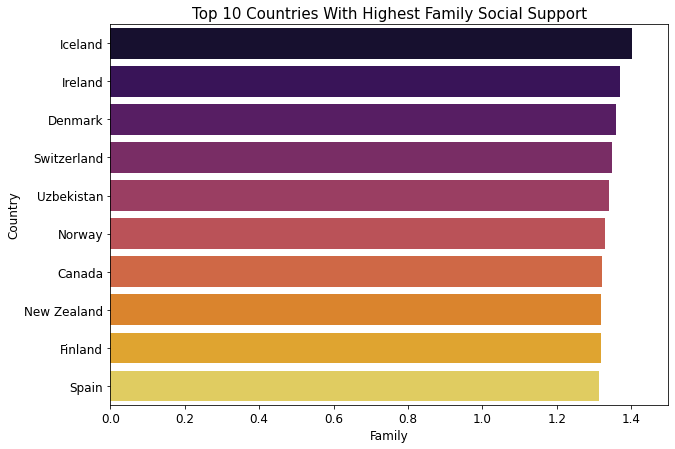

In [19]:
# visualization top 10 countries keeping family as a factor of happiness

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_family_top10['Country'], x=happiness2015_family_top10['Family'], palette='inferno', orient='h')
plt.title('Top 10 Countries With Highest Family Social Support', fontsize=15)
plt.xlabel('Family', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1.5)

#### The above table and barplot help us to know that Iceland have highest family support.

### Top 10 Countries With Lowest Family support 

In [20]:
happiness2015_family_bottom10 = happiness2015.groupby('Country')['Family'].max().sort_values(ascending=False).tail(10).reset_index()
happiness2015_family_bottom10.columns = ['Country','Family']
happiness2015_family_bottom10

,Country,Family
0,Bangladesh,0.43106
1,Burundi,0.41587
2,Pakistan,0.41411
3,Malawi,0.41134
4,Georgia,0.38562
5,India,0.38174
6,Benin,0.35386
7,Afghanistan,0.30285
8,Togo,0.13995
9,Central African Republic,0.00000


(0.0, 0.3)

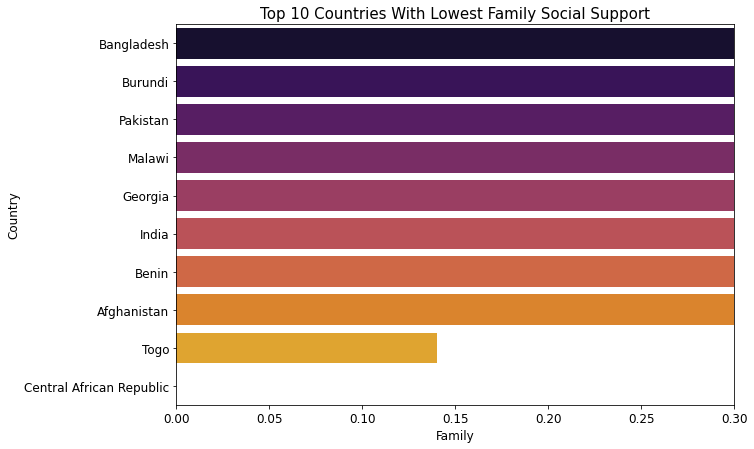

In [21]:
# visualization top 10 lowest family

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_family_bottom10['Country'], x=happiness2015_family_bottom10['Family'], palette='inferno', orient='h')
plt.title('Top 10 Countries With Lowest Family Social Support', fontsize=15)
plt.xlabel('Family', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.3)

#### The above table and barplot help us to know that Central African Republic country have lowest family support.

### Top 10 Countries With Highest Healthy Life Expectancy 

In [22]:
# Top 10 Countries With Highest Healthy Life Expectancy

happiness2015_health_top10 = happiness2015.groupby('Country')['Health (Life Expectancy)'].max().sort_values(ascending=False).head(10).reset_index()
happiness2015_health_top10.columns = ['Country','Health (Life Expectancy)']
happiness2015_health_top10

,Country,Health (Life Expectancy)
0,Singapore,1.02525
1,Hong Kong,1.01328
2,Japan,0.99111
3,South Korea,0.96538
4,Spain,0.95562
5,Italy,0.95446
6,Iceland,0.94784
7,France,0.94579
8,Switzerland,0.94143
9,Australia,0.93156


(0.0, 1.0)

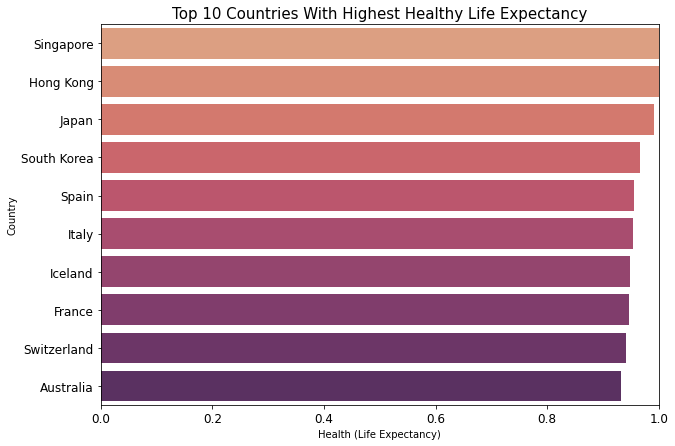

In [23]:
# # visualization top 10 highest family

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_health_top10['Country'], x=happiness2015_health_top10['Health (Life Expectancy)'], palette='flare', orient='h')
plt.title('Top 10 Countries With Highest Healthy Life Expectancy', fontsize=15)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Country')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1)

#### The above table and barplot help us to know that Singapore country have highest healthy life expectance.

### Top 10 Countries With Lowest Healthy Life Expectancy - 2015

In [24]:
# Top 10 Countries With Lowest Healthy Life Expectancy

happiness2015_health_bottom10 = happiness2015.groupby('Country')['Health (Life Expectancy)'].max().sort_values(ascending=False).tail(10).reset_index()
happiness2015_health_bottom10.columns = ['Country','Health (Life Expectancy)']
happiness2015_health_bottom10

,Country,Health (Life Expectancy)
0,Nigeria,0.16007
1,Ivory Coast,0.15185
2,Chad,0.15010
3,Congo (Kinshasa),0.09806
4,Mozambique,0.09131
5,Lesotho,0.07612
6,Swaziland,0.07566
7,Central African Republic,0.06699
8,Botswana,0.04776
9,Sierra Leone,0.00000


(0.0, 0.17)

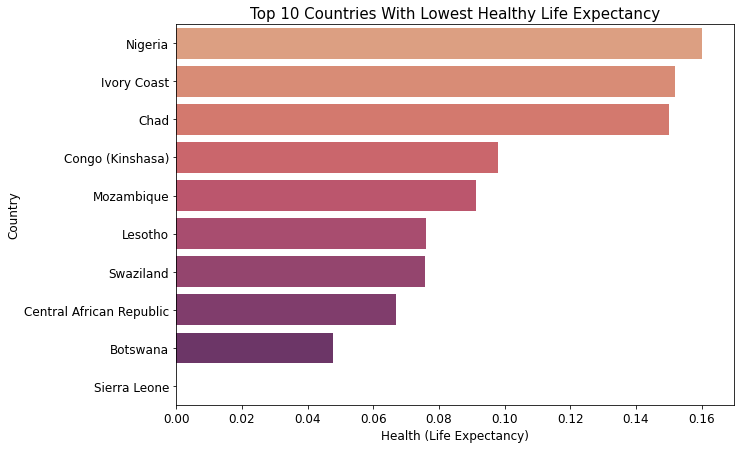

In [25]:
# visualization bottom 10 lowest family

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_health_bottom10['Country'], x=happiness2015_health_bottom10['Health (Life Expectancy)'], palette='flare', orient='h')
plt.title('Top 10 Countries With Lowest Healthy Life Expectancy', fontsize=15)
plt.xlabel('Health (Life Expectancy)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.17)

#### The above table and barplot help us to know that Sierra Leone country have lowest healthy life expectance.

### Top 10 Countries With Highest Freedom To Make Life Choices 

In [27]:
# Top 10 Countries With Highest Freedom To Make Life Choices

happiness2015_freedom_top10 = happiness2015.groupby('Country')['Freedom'].max().sort_values(ascending=False).head(10).reset_index()
happiness2015_freedom_top10.columns = ['Country','Freedom']
happiness2015_freedom_top10

,Country,Freedom
0,Norway,0.66973
1,Switzerland,0.66557
2,Cambodia,0.66246
3,Sweden,0.65980
4,Uzbekistan,0.65821
5,Australia,0.65124
6,Denmark,0.64938
7,Finland,0.64169
8,United Arab Emirates,0.64157
9,Qatar,0.64040


(0.0, 0.65)

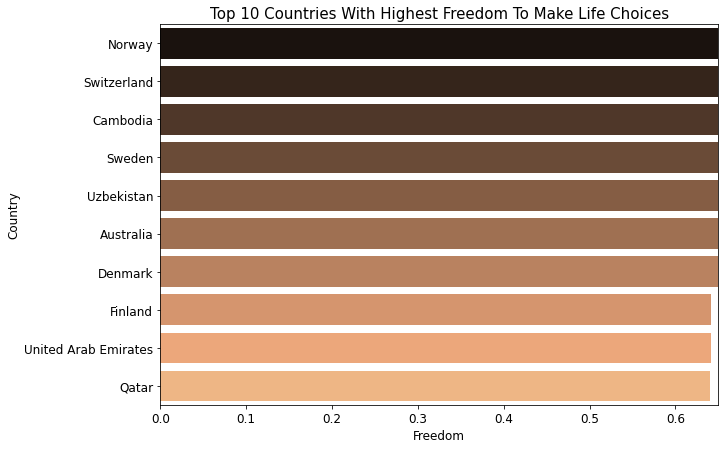

In [28]:
# visualization top 10 highest freedom

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_freedom_top10['Country'], x=happiness2015_freedom_top10['Freedom'], palette='copper', orient='h')
plt.title('Top 10 Countries With Highest Freedom To Make Life Choices', fontsize=15)
plt.xlabel('Freedom', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.65)

#### The above table and barplot help us to know that Norway country have highest Freedom To Make Life Choices.

### Top 10 Countries With Lowest Freedom To Make Life Choices 

In [29]:
# Top 10 Countries With Lowest Freedom To Make Life Choices

happiness2015_freedom_bottom10 = happiness2015.groupby('Country')['Freedom'].max().sort_values(ascending=False).tail(10).reset_index()
happiness2015_freedom_bottom10.columns = ['Country','Freedom']
happiness2015_freedom_bottom10

,Country,Freedom
0,Montenegro,0.18260
1,Egypt,0.17288
2,Syria,0.15684
3,Pakistan,0.12102
4,Burundi,0.11850
5,Angola,0.10384
6,Sudan,0.10081
7,Bosnia and Herzegovina,0.09245
8,Greece,0.07699
9,Iraq,0.00000


(0.0, 0.14)

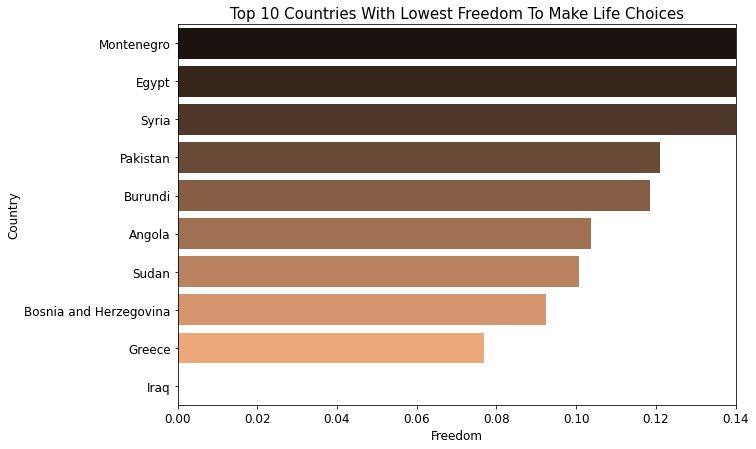

In [30]:
# visualization bottom 10 freedom

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_freedom_bottom10['Country'], x=happiness2015_freedom_bottom10['Freedom'], palette='copper', orient='h')
plt.title('Top 10 Countries With Lowest Freedom To Make Life Choices', fontsize=15)
plt.xlabel('Freedom', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.14)

#### The above table and barplot help us to know that Iraq country have lowest Freedom To Make Life Choices.

### Top 10 Countries With Highest Perceptions Of Corruption- Trust

In [31]:
# Top 10 Countries With Highest Perceptions Of Corruption- Trust 

happiness2015_Trust_top10 = happiness2015.groupby('Country')['Trust (Government Corruption)'].max().sort_values(ascending=False).head(10).reset_index()
happiness2015_Trust_top10.columns = ['Country','Trust (Government Corruption)']
happiness2015_Trust_top10

,Country,Trust (Government Corruption)
0,Rwanda,0.55191
1,Qatar,0.52208
2,Singapore,0.49210
3,Denmark,0.48357
4,Sweden,0.43844
5,New Zealand,0.42922
6,Switzerland,0.41978
7,Finland,0.41372
8,Somaliland region,0.39928
9,United Arab Emirates,0.38583


(0.0, 0.6)

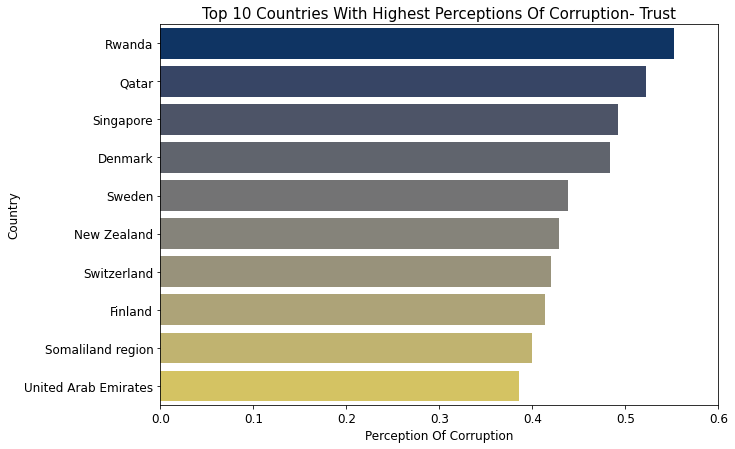

In [32]:
# visualization highest 10 Trust

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_Trust_top10['Country'], x=happiness2015_Trust_top10['Trust (Government Corruption)'], palette='cividis', orient='h')
plt.title('Top 10 Countries With Highest Perceptions Of Corruption- Trust', fontsize=15)
plt.xlabel('Perception Of Corruption', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.6)

#### The above table and barplot help us to know that Rwanda country have highest Perceptions Of Corruption- Trust.

### Top 10 Countries With Lowest Perceptions Of Corruption- Trust

In [34]:
# Top 10 Countries With Lowest Perceptions Of Corruption- Trust

happiness2015_trust_bottom10 = happiness2015.groupby('Country')['Trust (Government Corruption)'].max().sort_values(ascending=False).tail(10).reset_index()
happiness2015_trust_bottom10.columns = ['Country','Trust (Government Corruption)']
happiness2015_trust_bottom10

,Country,Trust (Government Corruption)
0,Jamaica,0.02299
1,Moldova,0.01615
2,Greece,0.01397
3,Trinidad and Tobago,0.01140
4,Portugal,0.01078
5,Lithuania,0.01031
6,Bulgaria,0.00872
7,Romania,0.00649
8,Bosnia and Herzegovina,0.00227
9,Indonesia,0.00000


(0.0, 0.03)

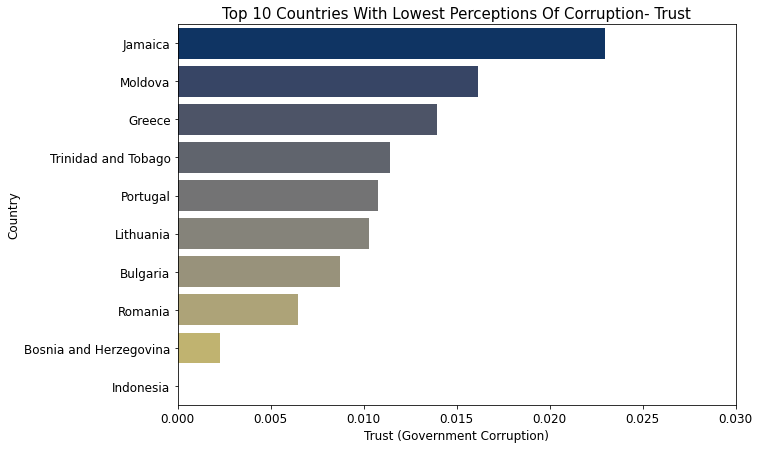

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_trust_bottom10['Country'], x=happiness2015_trust_bottom10['Trust (Government Corruption)'], palette='cividis', orient='h')
plt.title('Top 10 Countries With Lowest Perceptions Of Corruption- Trust', fontsize=15)
plt.xlabel('Trust (Government Corruption)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.03)

#### The above table and barplot help us to know that Indonesia country have lowest Perceptions Of Corruption- Trust.

### Top 10 Countries With Highest Generosity

In [36]:
# top 10 countries with highest generosity

happiness2015_gen_top10 = happiness2015.groupby('Country')['Generosity'].max().sort_values(ascending=False).head(10).reset_index()
happiness2015_gen_top10.columns = ['Country','Generosity']
happiness2015_gen_top10

,Country,Generosity
0,Myanmar,0.79588
1,Thailand,0.57630
2,United Kingdom,0.51912
3,Malta,0.51752
4,Indonesia,0.51535
5,Somaliland region,0.50318
6,Bhutan,0.47998
7,Netherlands,0.47610
8,New Zealand,0.47501
9,Syria,0.47179


(0.0, 0.9)

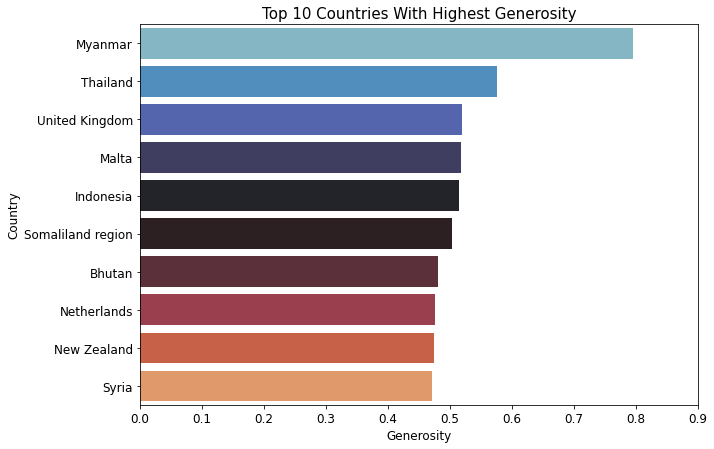

In [37]:
# visualization top 10 countries with highest generosity

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_gen_top10['Country'], x=happiness2015_gen_top10['Generosity'], palette='icefire', orient='h')
plt.title('Top 10 Countries With Highest Generosity', fontsize=15)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.9)

#### The above table and barplot help us to know that Myanmar country have highest Generosity.

### Top 10 Countries With Lowest Generosity

In [38]:
# Top 10 Countries With Lowest Generosity

happiness2015_gen_bottom10 = happiness2015.groupby('Country')['Generosity'].max().sort_values(ascending=False).tail(10).reset_index()
happiness2015_gen_bottom10.columns = ['Country','Generosity']
happiness2015_gen_bottom10

,Country,Generosity
0,Azerbaijan,0.07799
1,Morocco,0.07172
2,Gabon,0.06822
3,Tunisia,0.06431
4,Venezuela,0.05841
5,Georgia,0.05547
6,Croatia,0.05444
7,Lithuania,0.02641
8,Russia,0.00199
9,Greece,0.00000


(0.0, 0.07)

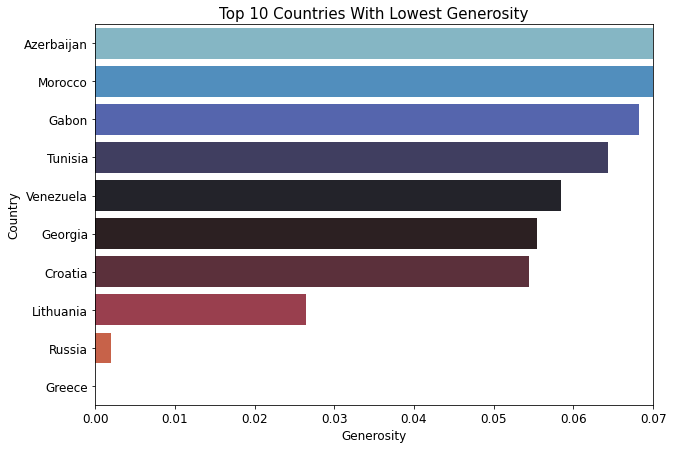

In [39]:
# visualization Top 10 Countries With Lowest Generosity

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_gen_bottom10['Country'], x=happiness2015_gen_bottom10['Generosity'], palette='icefire', orient='h')
plt.title('Top 10 Countries With Lowest Generosity', fontsize=15)
plt.xlabel('Generosity', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 0.07)

#### The above table and barplot help us to know that Azerbaijan country have lowest Generosity.

### Top 10 Countries With Highest Dystopia Residual

In [40]:
# Top 10 Countries With Highest Dystopia Residual

happiness2015_dystopia_top10 = happiness2015.groupby('Country')['Dystopia Residual'].max().sort_values(ascending=False).head(10).reset_index()
happiness2015_dystopia_top10.columns = ['Country','Dystopia Residual']
happiness2015_dystopia_top10

,Country,Dystopia Residual
0,Mexico,3.60214
1,Brazil,3.26001
2,Venezuela,3.19131
3,Costa Rica,3.17728
4,Moldova,3.10712
5,Pakistan,3.10709
6,Israel,3.08854
7,Mozambique,3.05137
8,El Salvador,3.03500
9,Nigeria,2.89319


(0.0, 3.9)

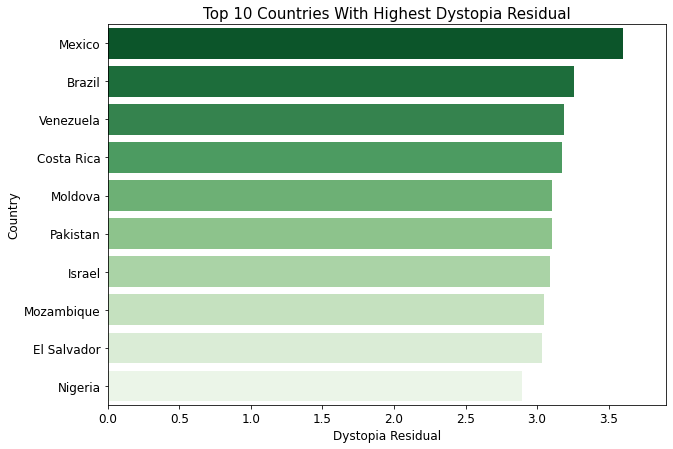

In [41]:
# visualization top 10 Countries With Highest Dystopia Residual

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_dystopia_top10['Country'], x=happiness2015_dystopia_top10['Dystopia Residual'], palette='Greens_r', orient='h')
plt.title('Top 10 Countries With Highest Dystopia Residual', fontsize=15)
plt.xlabel('Dystopia Residual', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 3.9)

#### The above table and barplot help us to know that Mexico country have highest Dystopia Residual.

### Top 10 Countries With Lowest Dystopia Residual

In [42]:
# Top 10 Countries With Lowest Dystopia Residual

happiness2015_dystopia_bottom10 = happiness2015.groupby('Country')['Dystopia Residual'].max().sort_values(ascending=False).tail(10).reset_index()
happiness2015_dystopia_bottom10.columns = ['Country','Dystopia Residual']
happiness2015_dystopia_bottom10

,Country,Dystopia Residual
0,Portugal,1.26462
1,Hungary,1.24074
2,Dominican Republic,1.21305
3,Gabon,0.99895
4,Cambodia,0.98195
5,Bulgaria,0.89991
6,Sri Lanka,0.67108
7,Rwanda,0.67042
8,Hong Kong,0.65429
9,Syria,0.32858


(0.0, 1.6)

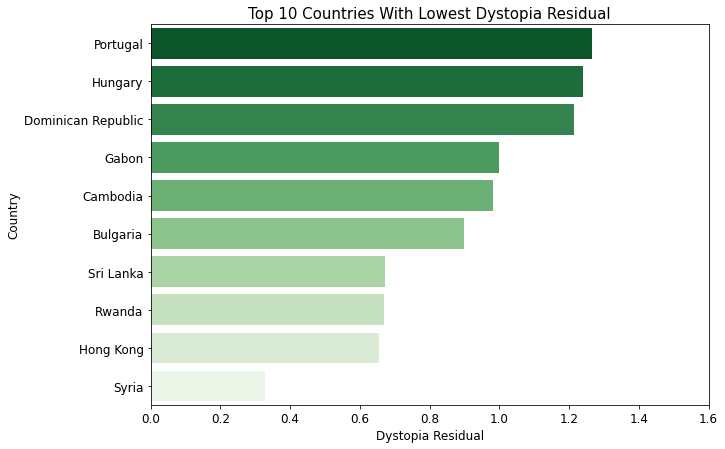

In [43]:
# Top 10 Countries With Lowest Dystopia Residual

plt.figure(figsize=(10,7))
sns.barplot(y=happiness2015_dystopia_bottom10['Country'], x=happiness2015_dystopia_bottom10['Dystopia Residual'], palette='Greens_r', orient='h')
plt.title('Top 10 Countries With Lowest Dystopia Residual', fontsize=15)
plt.xlabel('Dystopia Residual', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1.6)

#### The above table and barplot help us to know that Syria country have lowest Dystopia Residual.

## Relationship between independent variable and dependent variables through scatter plot.

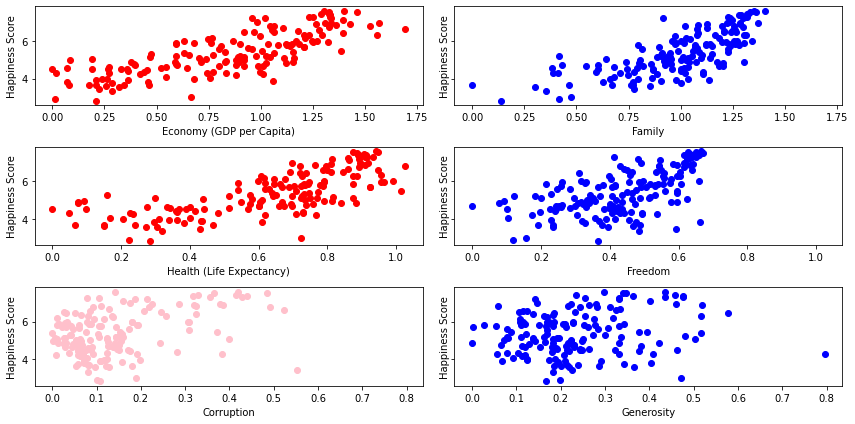

In [4]:
# scatter plots shown below

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6), sharey='row', sharex='row')

axes[0, 0].scatter(x=happiness2015['Economy (GDP per Capita)'], y=happiness2015['Happiness Score'], color="red")
axes[0, 0].set_xlabel('Economy (GDP per Capita)')
axes[0, 0].set_ylabel('Happiness Score')

axes[0, 1].scatter(x=happiness2015['Family'], y=happiness2015['Happiness Score'], color="blue")
axes[0, 1].set_xlabel('Family')
axes[0, 1].set_ylabel('Happiness Score')

axes[1, 0].scatter(x=happiness2015['Health (Life Expectancy)'], y=happiness2015['Happiness Score'], color="red")
axes[1, 0].set_xlabel('Health (Life Expectancy)')
axes[1, 0].set_ylabel('Happiness Score')

axes[1, 1].scatter(x=happiness2015['Freedom'], y=happiness2015['Happiness Score'], color="blue")
axes[1, 1].set_xlabel('Freedom')
axes[1, 1].set_ylabel('Happiness Score')

axes[2, 0].scatter(x=happiness2015['Trust (Government Corruption)'],y=happiness2015['Happiness Score'], color="pink")
axes[2, 0].set_xlabel('Corruption')
axes[2, 0].set_ylabel('Happiness Score')

axes[2, 1].scatter(x=happiness2015['Generosity'], y=happiness2015['Happiness Score'], color="blue")
axes[2, 1].set_xlabel('Generosity')
axes[2, 1].set_ylabel('Happiness Score')

fig.tight_layout()

### From above scatter plot, we can see that, except Perception Of Corruption every other thing like Economy (GDP Per Capita), Family Social Support, Health (Life Expectancy), Freedom To Choose Thing & Generosity makes people happy.

In [51]:
# Dropping the unwanted columns

happiness2015.drop(['Country','Region','Happiness Rank','Standard Error'],axis=1,inplace=True)
happiness2015.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


# ML Prediction

In [52]:
# divide dataset into feature and label

y = happiness2015['Happiness Score']
x = happiness2015.drop(columns = ['Happiness Score'])

In [53]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


In [54]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
5      7.406
6      7.378
7      7.364
8      7.286
9      7.284
10     7.278
11     7.226
12     7.200
13     7.187
14     7.119
15     6.983
16     6.946
17     6.940
18     6.937
19     6.901
20     6.867
21     6.853
22     6.810
23     6.798
24     6.786
25     6.750
26     6.670
27     6.611
28     6.575
29     6.574
30     6.505
31     6.485
32     6.477
33     6.455
34     6.411
35     6.329
36     6.302
37     6.298
38     6.295
39     6.269
40     6.168
41     6.130
42     6.123
43     6.003
44     5.995
45     5.987
46     5.984
47     5.975
48     5.960
49     5.948
50     5.890
51     5.889
52     5.878
53     5.855
54     5.848
55     5.833
56     5.828
57     5.824
58     5.813
59     5.791
60     5.770
61     5.759
62     5.754
63     5.716
64     5.709
65     5.695
66     5.689
67     5.605
68     5.589
69     5.548
70     5.477
71     5.474
72     5.429
73     5.399
74     5.360
75     5.332
76     5.286

In [58]:
# data scaling

Scaler = StandardScaler()
x_Scaled = Scaler.fit_transform(x)
x_Scaled

array([[ 1.36962124e+00,  1.32028142e+00,  1.26340809e+00,
         1.57743784e+00,  2.30965159e+00,  4.71039706e-01],
       [ 1.13522625e+00,  1.51445776e+00,  1.28943383e+00,
         1.33245589e+00, -1.64795307e-02,  1.57585637e+00],
       [ 1.19286069e+00,  1.36105403e+00,  9.92228817e-01,
         1.46965910e+00,  2.84277380e+00,  8.24292797e-01],
       [ 1.52512972e+00,  1.25192192e+00,  1.03514490e+00,
         1.60513145e+00,  1.85208080e+00,  8.68637502e-01],
       [ 1.19487640e+00,  1.22120434e+00,  1.11805373e+00,
         1.36041579e+00,  1.55572536e+00,  1.74856316e+00],
       [ 1.10518965e+00,  1.20518259e+00,  1.05097959e+00,
         1.41846586e+00,  2.25900540e+00, -2.99762791e-02],
       [ 1.20271529e+00,  1.06489092e+00,  1.06612405e+00,
         1.24584679e+00,  1.46019962e+00,  1.89102052e+00],
       [ 1.20836426e+00,  1.09767107e+00,  1.13932906e+00,
         1.53902627e+00,  2.46560175e+00,  9.92406743e-01],
       [ 1.00547410e+00,  1.21037585e+00,  1.129

In [68]:
# training and test model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=12)

### I have used 30% of dataset for testing purpose and 70% for training.

# Decision Tree Model

In [69]:
# predicting the model through decision tree

from sklearn.tree import DecisionTreeRegressor
RTD = DecisionTreeRegressor(random_state = 12)
RTD.fit(x_train, y_train)
y_pred = RTD.predict(x_test)
r2_score(y_test, y_pred)

0.5250816923413237

# LinearRegression

In [70]:
# predicting the model through LinearRegression

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.6745048151531059

# Random Forest Model

In [71]:
# predicting the model through RandomForest

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10,random_state = 12 )
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
r2_score(y_test, y_pred)

0.623148588548857

# Support vector machine

In [72]:
# predicting the model through Support vector machine

from sklearn.svm import SVR

SVR_Reg = SVR(kernel = "rbf",degree=3, C=40)
SVR_Reg.fit(x_train, y_train)
y_pred = SVR_Reg.predict(x_test)
r2_score(y_test, y_pred)

0.5584654721039793

# Conclusion

#### GDP per capita is having highest impact on Happiness score.

Family is second in the list to impact Happiness score.

Healthy Life Expectancy is third in the list to impact Happiness score.

Freedom is fourth in the list to impact Happiness score.

Trust (Government Corruption)lies after Freedom to impact Happiness Score.

Generosity is the least in the factors to impacts Happiness score

Inference -
1. Decision Tree r2_score - 52.5%
2. LinearRegression r2_score - 67.4%
3. Random Forest r2_score - 62.3%
4. Support vector machine r2_score - 55.8% 
Hence, LinearRegression is best out of four models.